In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Exercise 1 Power iteration algorithm

We here consider the matrix $A \in M_N(\mathbb{R})$ defined by


\begin{equation}
A = \begin{pmatrix}
2 & -1 & 0 ... & 0 \\
-1 & 2 & -1 & 0 ... & 0 \\
0 & ... & ...& ... & 0 \\
... & ... & -1 & 2 & -1 \\
0 & ... & 0 & -1 & 2
\end{pmatrix}
\end{equation}



## Part 1

We consider the Cases $N=10$ and $N=100$ we will construct $A$ for the 2 vlaues of $N$ and programm the power method to compute the largest eigenvalue of $A$ plot the evolution of the computed eigenvalue as a function of the number of iterations.



We consider a diagonizable matrix $A$ with the eigenvalue decompositon

\begin{equation}
A = V \Lambda V^{-1}
\end{equation}

with $\Lambda = diag(\lambda_1, \lambda_2, ..., \lambda_N)$ the diagonal matrix of eigenvalues and $V$ the matrix of eigenvectors. The power method consists in iteratively computing

When we take powers of $A$:

$A^k = V \Lambda^k V^{-1}$

Idea take a random vector $b \in \mathbb{R}^N$ and compute

\begin{equation}
b = \sum_{i=1}^N v_ib_i = V \tilde{b}
\end{equation}

Now rewrite $A^k b = A^k V \tilde{b}$ as a sum over eigenvalues



**Final Algorithm**
1. Draw random vector $b_0$
2. Set $b_1 := Ab_0$
3. For $k=2... K,$ set $\tilde{b}_k := Ab_{k-1}$ normalize by setting $b_k = \frac{\tilde{b}_k}{\|\tilde{b}_k\|}$
4. Return $b_K$

In [2]:
import numpy as np

def create_tridiagonal_matrix(N):
    """Creates the tridiagonal matrix A of size N x N as described above."""
    A = 2 * np.eye(N)
    for i in range(N - 1):
        A[i, i + 1] = -1
        A[i + 1, i] = -1
    return A


In [3]:
def power_iteration_eigvals(A,num_iterations=1000):
    """ 
    Applies the powert iteration method to find the largest eigenvalue of matrix A
    """
    b = np.random.rand(A.shape[1])
    b_k_list = []

    for i in range(num_iterations):
        
        # New
        b_k_tilde = A @ b
        b_k = b_k_tilde / np.linalg.norm(b_k_tilde)
        b_k_list.append(b_k)
        b = b_k

    return b, b_k_list


Now for the values values of $N = 10$ and $N=100$ we plot the evolution of the eigenvalue as a function of the nmber of iterations. And provide the order and rate of convergence.

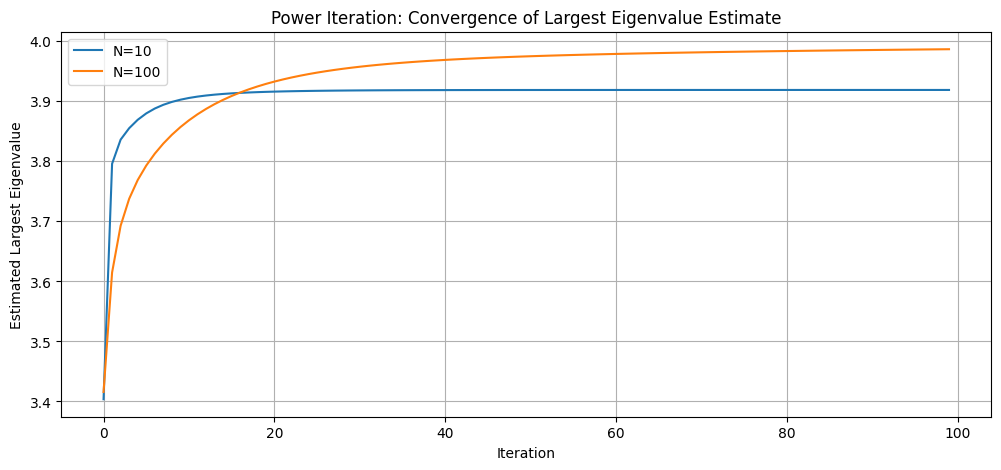

In [4]:
# Compute and plot the evolution of the largest eigenvalue estimate for N=10 and N=100

Ns = [10, 100]
num_iterations = 100

plt.figure(figsize=(12, 5))

for idx, N in enumerate(Ns):
    A = create_tridiagonal_matrix(N)
    _, b_k_list = power_iteration_eigvals(A, num_iterations=num_iterations) 
    plt.plot(range(num_iterations), [np.linalg.norm(A @ b_k) for b_k in b_k_list], label=f'N={N}')

plt.xlabel('Iteration')
plt.ylabel('Estimated Largest Eigenvalue')
plt.title('Power Iteration: Convergence of Largest Eigenvalue Estimate')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
b, _ = power_iteration_eigvals(create_tridiagonal_matrix(100), num_iterations=1000)
print(f"Largest eigenvalue estimate for N=100: {np.linalg.norm(create_tridiagonal_matrix(100) @ b)}")
b, _ = power_iteration_eigvals(create_tridiagonal_matrix(10), num_iterations=1000)
print(f"Largest eigenvalue estimate for N=10: {np.linalg.norm(create_tridiagonal_matrix(10) @ b)}")

Largest eigenvalue estimate for N=100: 3.9989867405725623
Largest eigenvalue estimate for N=10: 3.918985947228995


## Part 2

Programm the inverse power method to compute the smalles eigenvalue of $A$ and again plot the evolution of this eigenvalue a a function of the number of iterations provide the order and rate of convergence.

In [6]:
def inverse_power_iteration_eigvals(A, num_iterations=100):
    A_inv = np.linalg.inv(A)
    b = np.random.rand(A.shape[1])
    b_k_list = []
    for i in range(num_iterations):
        b_k_tilde = A_inv @ b
        b_k = b_k_tilde / np.linalg.norm(b_k_tilde)
        b_k_list.append(b_k)
        b = b_k
    return b, b_k_list
        

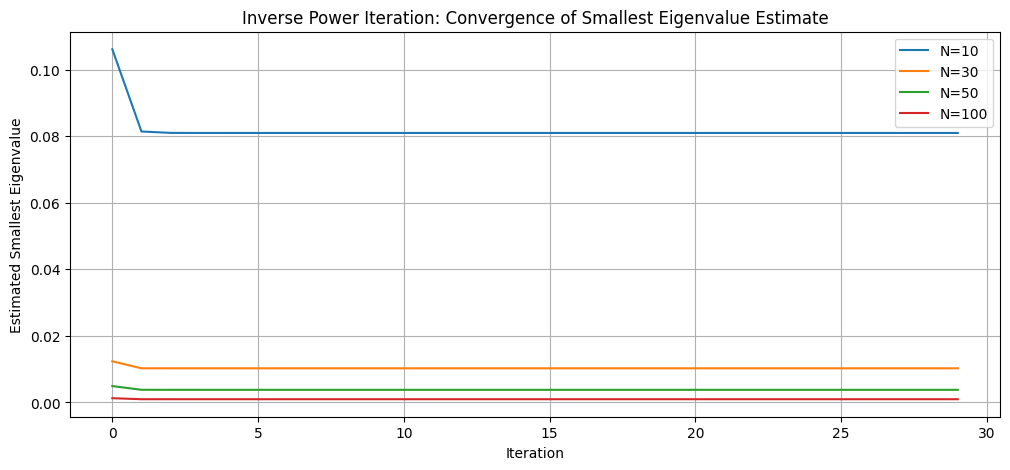

In [7]:
plt.figure(figsize=(12, 5))
num_iterations=30
Ns = [10,30,50, 100]
for N in Ns:
    A = create_tridiagonal_matrix(N)
    _, b_k_list = inverse_power_iteration_eigvals(A, num_iterations=num_iterations)
    # Estimate smallest eigenvalue at each iteration
    eigvals_inv = [np.linalg.norm(A @ b_k) for b_k in b_k_list]
    plt.plot(range(num_iterations), eigvals_inv, label=f'N={N}')

plt.xlabel('Iteration')
plt.ylabel('Estimated Smallest Eigenvalue')
plt.title('Inverse Power Iteration: Convergence of Smallest Eigenvalue Estimate')
plt.legend()
plt.grid(True)
plt.show()

## Part 3 (Optional)

It can be shown that the eigenvalues of $A$ lie between $0$ and $$ implement an algoritm to compute the eigenvalue of $A$ closest to $1$

In [8]:
A = create_tridiagonal_matrix(3)
eigvals, eigenvecs = np.linalg.eig(A)
print(f"Eigenvalues of the tridiagonal matrix A (N=100): {eigvals}")



Eigenvalues of the tridiagonal matrix A (N=100): [3.41421356 2.         0.58578644]


**Shifted Inverse Power Method**

So the inverse power method computes the eigenvalue closest to $0$, by shifting we can compute the eigenvalue closest to any chosen value $s$. Then by searching various values of this $s$ we can hope to find all other eigenvalues.

Main idea is that for any number $s$ matrix $A-sI$ has eigenvalues $\lambda_i -  s$ with the same eigenvectors as $A$

\begin{equation}
(A-sI)v_i = (\lambda_i - s)v_i
\end{equation}

Thus applying the inverse power method to $A-sI$ computes the largest eigenvalue $\gamma$ and then $\lambda=1/(\gamma + s)$ is the eigenvalue closest to $s$.




In [224]:
from scipy.linalg import lu_factor, lu_solve

def shifted_inverse_power_method(A,s,max_iter=1000,tol=1e-10):
    """
    Uses the shifted inverse power method to find the eigenvalue closest to s.

    Parameters:
    A : np.ndarray
        The matrix for which we want to find the eigenvalue.
    s : float
        The shift value, (search value)
    max_iter : int
        The maximum number of iterations.
    tol : float
        The tolerance for convergence.
    """
    n = A.shape[0]
    I = np.eye(n)
    A_shifted = A - s * I

    # LU Decomposition
    lu, piv = lu_factor(A_shifted)

    v = np.random.rand(n)
    v = v/ np.linalg.norm(v)

    eigenvalue_old = 0
    for _ in range(max_iter):
        # Solve (A-sI)w = v
        w = lu_solve((lu, piv), v)

        # Approximate the eigenvalue
        eigenvalue_new = np.dot(v,w)
        
        #Normalize 
        v_new = w/ np.linalg.norm(w)

        # Check for convergence
        if np.abs(eigenvalue_new - eigenvalue_old) < tol:
            break
        v = v_new
        eigenvalue_old = eigenvalue_new

    # Convert back
    eigenvalue = s + 1/eigenvalue_new
    return eigenvalue, v

# Now implement a method to get all the eigenvalues of the matrix A using the shifted inverse power method

def find_all_eigenvalues(A, num_shifts=10, max_iter=1000,tol=1e-8):
    """
    Finds all the eigenvalues of the matrix A using the shifted inverse power method

    Parameters:
    A : np.ndarray
        The matrix for which we want to find the eigenvalues.
    num_shifts : int
        The number of shifts to use.
    max_iter : int
        The maximum number of iterations.
    tol : float
        The tolerance for convergence.
    """
    n = A.shape[0]
    eigenvalues = []

    # Find the largest magnitude eigenvalue
    # For this i use normal power iteration
    b, _ = power_iteration_eigvals(A, num_iterations=max_iter)
    lambda_max = np.linalg.norm(A @ b) 
    eigenvalues.append(lambda_max)

    # For symmetric matrices the range
    # of eigenvalues is givren by [-|lambda_max|, |lambda_max|] 
    if np.allclose(A, A.T):
        a  = -abs(lambda_max)
        b = abs(lambda_max)
    else:
        # For normal matrices we use Gershgorin Circles
        a = np.min(np.diag(A) - np.sum(np.abs(A),axis=1))
        b = np.max(np.diag(A) + np.sum(np.abs(A),axis=1))

    print(a,b)
    # Generate shifts
    shifts = np.linspace(a, b, num_shifts)

    for s in shifts:
        try:
            lambda_s, _ = shifted_inverse_power_method(A, s, max_iter=max_iter, tol=tol)

            # Check if this is a new eigenvalue
            is_new = True
            for ev in eigenvalues:
                if np.abs(ev-lambda_s) < tol:
                    is_new = False
                    break
            if is_new:
                eigenvalues.append(lambda_s)
        except np.linalg.LinAlgError:
            print(f"Failed to converge for shift {s}. Skipping.")
            continue
    # Remove duplicates and sort
    unique_eigenvalues = np.unique(np.round(eigenvalues, decimals=5))

    return sorted(unique_eigenvalues)

In [240]:
# Find all eigenvalues of the tridiagonal matrix A for N=100
A = create_tridiagonal_matrix(6)
eigenvalues = find_all_eigenvalues(A, num_shifts=100, max_iter=1000, tol=1e-8)
print(eigenvalues)

# find eigenvalues using numpy
eigenvalues_np, _ = np.linalg.eig(A)
print(f"Eigenvalues using numpy: {np.sort(eigenvalues_np)}")

-3.801937735804838 3.801937735804838
[np.float64(0.19806), np.float64(0.75302), np.float64(1.55496), np.float64(2.44504), np.float64(3.24698), np.float64(3.80194)]
Eigenvalues using numpy: [0.19806226 0.7530204  1.55495813 2.44504187 3.2469796  3.80193774]


One can here clearly see that this method works, but it is not very efficient and very dependent on the choice of the number of shifts.

# Exercise 2 (Power Iteration Algorithm)

In this example, we explore the limitations of the power method. Let $A$ be the matrix

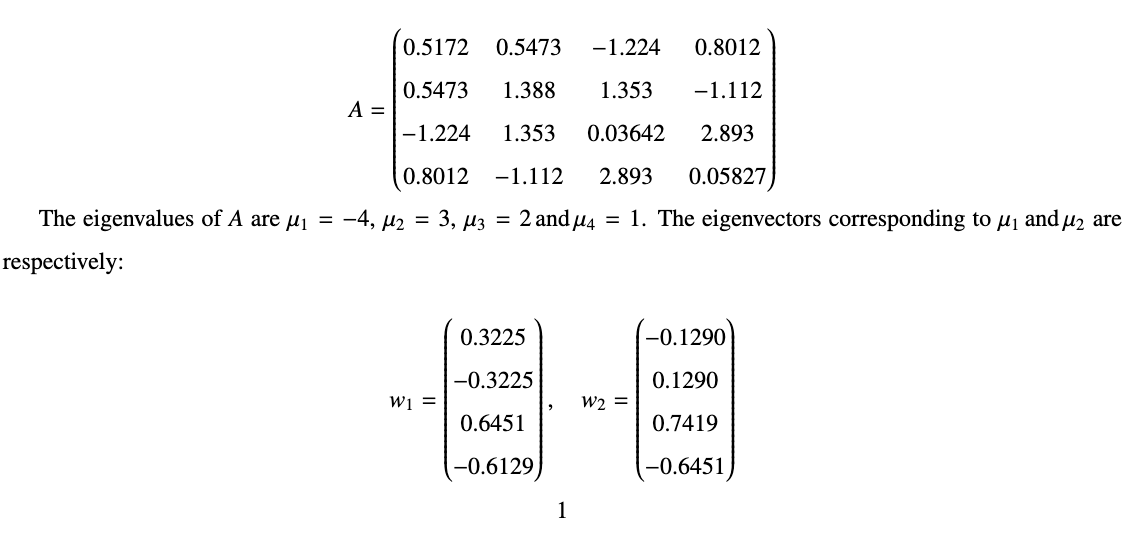

## Part 1

Implement the power method with the initial vector $x_0 = (1,0,0,0)^T$ and study the evolution of the computed eigenvalue and plot $||x_k||_2$ as a function of iterations.



In [241]:
A= np.array(
    [[0.5172, 0.5473, -1.224, 0.8012],
    [0.5473, 1.388, 1.353, -1.112],
    [-1.224, 1.353, 0.03642, 2.893],
    [0.8012, -1.112, 2.893, 0.05172]]
)

mu_1 = -4
mu_2 = 3
mu_3 = 2
mu_4 = 1

w_1 = np.array([0.3225,-0.3225,0.6451,-0.6129])
w_2 = np.array([-0.1290,0.1290,0.7419,-0.6451])


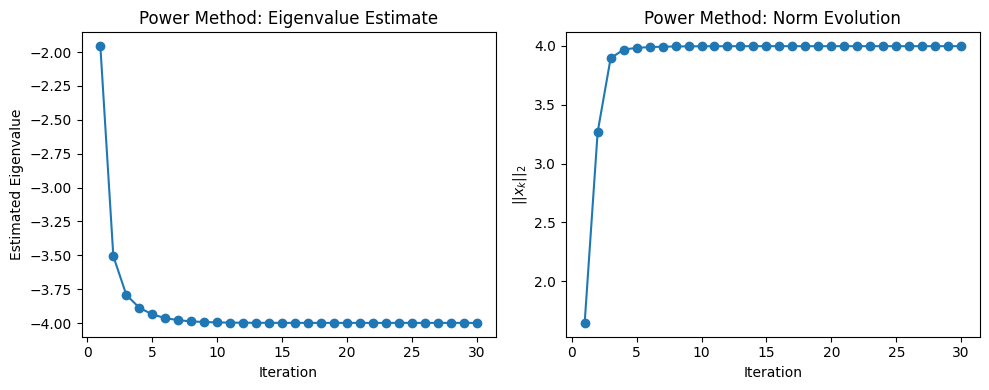

In [242]:
# Power method with initial vector x0 = (1, 0, 0, 0)^T for matrix A
x0 = np.array([1.0, 0.0, 0.0, 0.0])
num_iters = 30
x = x0.copy()
norms = []
eig_estimates = []

for _ in range(num_iters):
    x = A @ x
    norm_x = np.linalg.norm(x)
    norms.append(norm_x)
    x = x / norm_x
    eig_estimates.append(x @ (A @ x))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_iters+1), eig_estimates, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Estimated Eigenvalue')
plt.title('Power Method: Eigenvalue Estimate')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_iters+1), norms, marker='o')
plt.xlabel('Iteration')
plt.ylabel(r'$||x_k||_2$')
plt.title('Power Method: Norm Evolution')

plt.tight_layout()
plt.show()

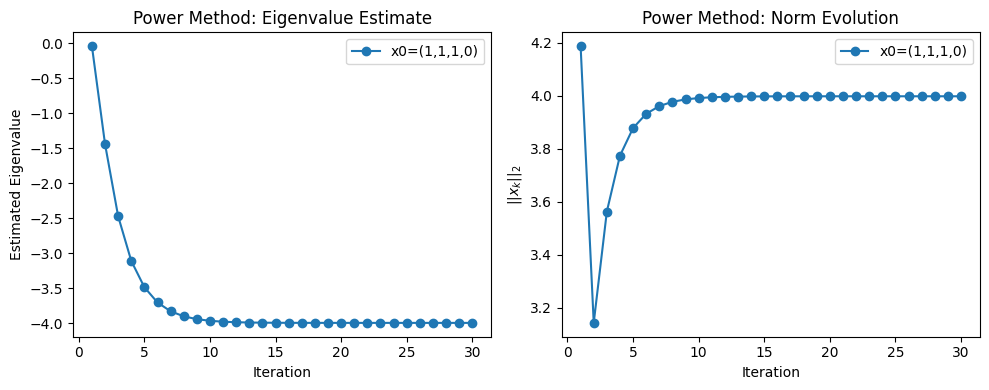

In [243]:
# Power method with initial vector x0 = (1, 1, 1, 0)^T for matrix A
x0_new = np.array([1, 1.0, 1.0, 0.0])
x_new = x0_new.copy()
norms_new = []
eig_estimates_new = []

for _ in range(num_iters):
    x_new = A @ x_new
    norm_x_new = np.linalg.norm(x_new)
    norms_new.append(norm_x_new)
    x_new = x_new / norm_x_new
    eig_estimates_new.append(x_new @ (A @ x_new))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_iters+1), eig_estimates_new, marker='o', label='x0=(1,1,1,0)')
plt.xlabel('Iteration')
plt.ylabel('Estimated Eigenvalue')
plt.title('Power Method: Eigenvalue Estimate')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_iters+1), norms_new, marker='o', label='x0=(1,1,1,0)')
plt.xlabel('Iteration')
plt.ylabel(r'$||x_k||_2$')
plt.title('Power Method: Norm Evolution')
plt.legend()

plt.tight_layout()
plt.show()


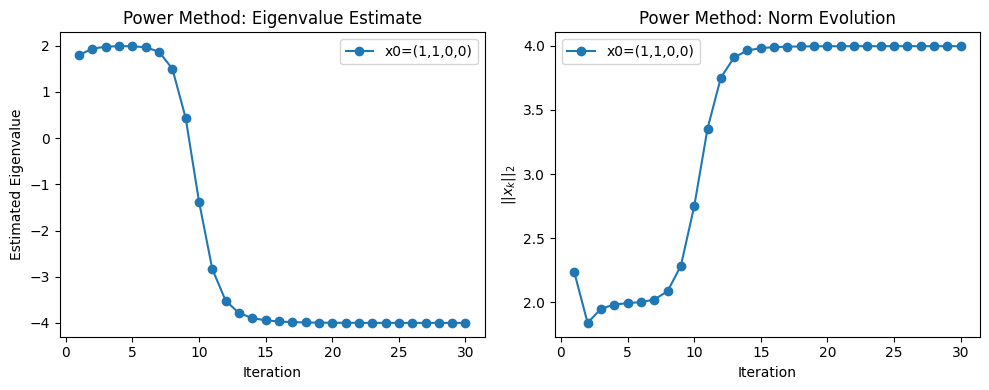

In [244]:
# Power method with initial vector x0 = (1, 1, 0, 0)^T for matrix A
x0_ortho = np.array([1.0, 1.0, 0.0, 0.0])
x_ortho = x0_ortho.copy()
norms_ortho = []
eig_estimates_ortho = []

for _ in range(num_iters):
    x_ortho = A @ x_ortho
    norm_x_ortho = np.linalg.norm(x_ortho)
    norms_ortho.append(norm_x_ortho)
    x_ortho = x_ortho / norm_x_ortho
    eig_estimates_ortho.append(x_ortho @ (A @ x_ortho))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_iters+1), eig_estimates_ortho, marker='o', label='x0=(1,1,0,0)')
plt.xlabel('Iteration')
plt.ylabel('Estimated Eigenvalue')
plt.title('Power Method: Eigenvalue Estimate')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_iters+1), norms_ortho, marker='o', label='x0=(1,1,0,0)')
plt.xlabel('Iteration')
plt.ylabel(r'$||x_k||_2$')
plt.title('Power Method: Norm Evolution')
plt.legend()

plt.tight_layout()
plt.show()

# Exercise 3 (SVD)

Create the following 2D NumPY Arrays:

+ A small $3 \times 2$ matrix
+ A $5 \times 5 $matrix with repeated rows/columns
+ A $10 \times 8$ matrix with random values


In [245]:
# Small 3x2 matrix
A_small = np.array([[1, 2],
                    [3, 4],
                    [5, 6]])

# 5x5 matrix with repeated rows/columns
A_repeated = np.array([[1, 2, 3, 4, 5],
                       [1, 2, 3, 4, 5],
                       [6, 7, 8, 9, 0],
                       [6, 7, 8, 9, 0],
                       [1, 2, 3, 4, 5]])

# 10x8 matrix with random values
A_random = np.random.rand(10, 8)

print("A_small:\n", A_small)
print("\nA_repeated:\n", A_repeated)
print("\nA_random:\n", A_random)

A_small:
 [[1 2]
 [3 4]
 [5 6]]

A_repeated:
 [[1 2 3 4 5]
 [1 2 3 4 5]
 [6 7 8 9 0]
 [6 7 8 9 0]
 [1 2 3 4 5]]

A_random:
 [[0.58736987 0.08540248 0.44980399 0.75635605 0.79413456 0.49459705
  0.89474757 0.26766844]
 [0.4105987  0.89859691 0.89625672 0.68571277 0.85898055 0.08877327
  0.86499498 0.32061991]
 [0.17833151 0.23936984 0.41796851 0.251192   0.32056759 0.13497849
  0.29617677 0.57228381]
 [0.44185371 0.34671876 0.74645213 0.89350997 0.75678922 0.3320007
  0.74444217 0.15198018]
 [0.13031799 0.34562704 0.80770237 0.24634825 0.06325341 0.13170954
  0.85874497 0.63378328]
 [0.25320116 0.55529583 0.52757962 0.65543598 0.23318755 0.86440299
  0.30936856 0.69413165]
 [0.01612465 0.37265713 0.35170982 0.54348443 0.07273626 0.79013137
  0.2177808  0.67703781]
 [0.80321212 0.56187696 0.74088321 0.66186031 0.3555298  0.80885854
  0.29470137 0.57121292]
 [0.74539774 0.37895591 0.30276761 0.45934601 0.81796349 0.92992176
  0.54508341 0.66146621]
 [0.90327362 0.09854685 0.23207858 0.708

For each matrix:

+ Print the original matrix
+ Compute its SVD using numpy's `np.linalg.svd` function
+ Print U,S,V^T 
+ Verify that $A = U S V^T$ by reconstructing the original matrix from the SVD components.
+ Plot the singular value


A_small:
[[1 2]
 [3 4]
 [5 6]]

U (A_small):
[[-0.2298477   0.88346102]
 [-0.52474482  0.24078249]
 [-0.81964194 -0.40189603]]

S (A_small):
[9.52551809 0.51430058]

V^T (A_small):
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]

Reconstructed A_small:
[[1. 2.]
 [3. 4.]
 [5. 6.]]

Reconstruction close: True



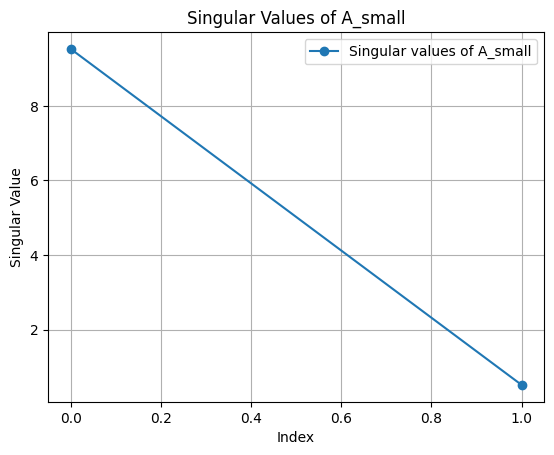


A_repeated:
[[1 2 3 4 5]
 [1 2 3 4 5]
 [6 7 8 9 0]
 [6 7 8 9 0]
 [1 2 3 4 5]]

U (A_repeated):
[[-2.57751920e-01 -5.16621023e-01  8.15229218e-01 -4.54751367e-02
   1.03101329e-16]
 [-2.57751920e-01 -5.16621023e-01 -4.46997233e-01 -6.83271645e-01
  -1.56652019e-16]
 [-6.32728948e-01  3.15680342e-01  0.00000000e+00 -2.42861287e-17
  -7.07106781e-01]
 [-6.32728948e-01  3.15680342e-01  0.00000000e+00  3.46944695e-18
   7.07106781e-01]
 [-2.57751920e-01 -5.16621023e-01 -3.68231986e-01  7.28746781e-01
   1.90292676e-16]]

S (A_repeated):
[2.36171063e+01 8.19952981e+00 1.07345587e-15 1.35449000e-16
 9.06668613e-33]

V^T (A_repeated):
[[-0.35423489 -0.44055849 -0.52688209 -0.6132057  -0.16370671]
 [ 0.27297919  0.16096029  0.04894138 -0.06307753 -0.94509265]
 [-0.84911425  0.45695374  0.2114726   0.02269205 -0.15799585]
 [-0.27583909 -0.58878838 -0.08595332  0.71824219 -0.23233859]
 [ 0.05401663  0.47383703 -0.81724621  0.32189008  0.03249753]]

Reconstructed A_repeated:
[[1.0000000e+00 2.000

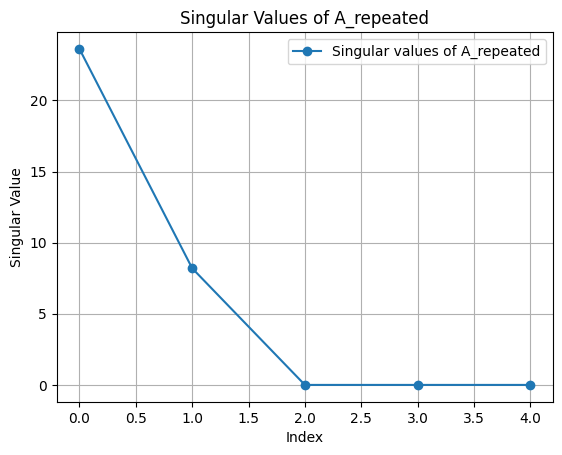


A_random:
[[0.58736987 0.08540248 0.44980399 0.75635605 0.79413456 0.49459705
  0.89474757 0.26766844]
 [0.4105987  0.89859691 0.89625672 0.68571277 0.85898055 0.08877327
  0.86499498 0.32061991]
 [0.17833151 0.23936984 0.41796851 0.251192   0.32056759 0.13497849
  0.29617677 0.57228381]
 [0.44185371 0.34671876 0.74645213 0.89350997 0.75678922 0.3320007
  0.74444217 0.15198018]
 [0.13031799 0.34562704 0.80770237 0.24634825 0.06325341 0.13170954
  0.85874497 0.63378328]
 [0.25320116 0.55529583 0.52757962 0.65543598 0.23318755 0.86440299
  0.30936856 0.69413165]
 [0.01612465 0.37265713 0.35170982 0.54348443 0.07273626 0.79013137
  0.2177808  0.67703781]
 [0.80321212 0.56187696 0.74088321 0.66186031 0.3555298  0.80885854
  0.29470137 0.57121292]
 [0.74539774 0.37895591 0.30276761 0.45934601 0.81796349 0.92992176
  0.54508341 0.66146621]
 [0.90327362 0.09854685 0.23207858 0.70890001 0.82374446 0.85702903
  0.41510718 0.0893399 ]]

U (A_random):
[[-0.34393261  0.05053879 -0.35611636 -0.460

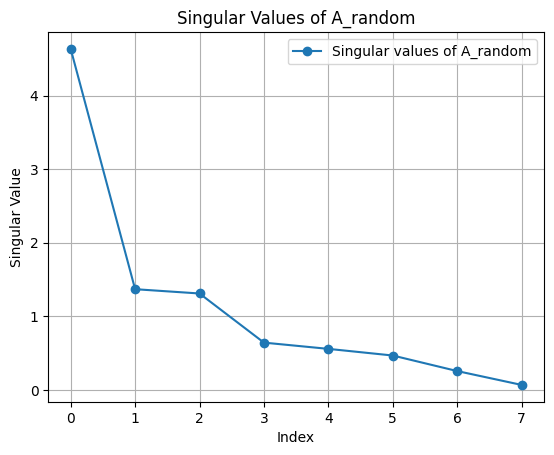

In [246]:
matrices = {
    "A_small": A_small,
    "A_repeated": A_repeated,
    "A_random": A_random
}

for name, mat in matrices.items():
    print(f"\n{name}:\n{mat}\n")
    U, S, VT = np.linalg.svd(mat, full_matrices=False)
    print(f"U ({name}):\n{U}\n")
    print(f"S ({name}):\n{S}\n")
    print(f"V^T ({name}):\n{VT}\n")
    
    # Reconstruct the matrix
    S_mat = np.diag(S)
    A_reconstructed = U @ S_mat @ VT
    print(f"Reconstructed {name}:\n{A_reconstructed}\n")
    print(f"Reconstruction close: {np.allclose(mat, A_reconstructed)}\n")
    
    # Plot singular values
    plt.figure()
    plt.plot(S, 'o-', label=f'Singular values of {name}')
    plt.title(f'Singular Values of {name}')
    plt.xlabel('Index')
    plt.ylabel('Singular Value')
    plt.legend()
    plt.grid(True)
    plt.show()

## Part 2 

Load the image dog.png and convert it to grayscale.

+ Convert the image into a 2D NumPY float array
+ Compute tis full $SVD$ using $X = U*S*V^T$
+ Plot the first 100 singular values and their cummulative normalized sum
+ Reconstruct the image using the first 5,20,100 singular values


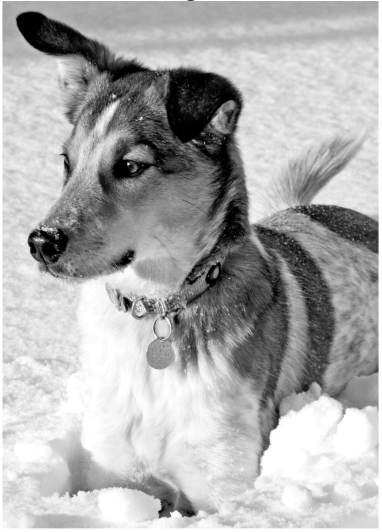

In [247]:
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt

# Load the image
image = Image.open('/Users/lukas/Desktop/Studium/Mathe/Numerik_2/Proseminar/Blatt 12/dog (1).png').convert('L')  # Convert to grayscale
image


Awwwww so cute doggo!

In [248]:
# Now convert the image to a numpy array
image_array = np.array(image)
print("Image shape:", image_array.shape)

Image shape: (532, 382)


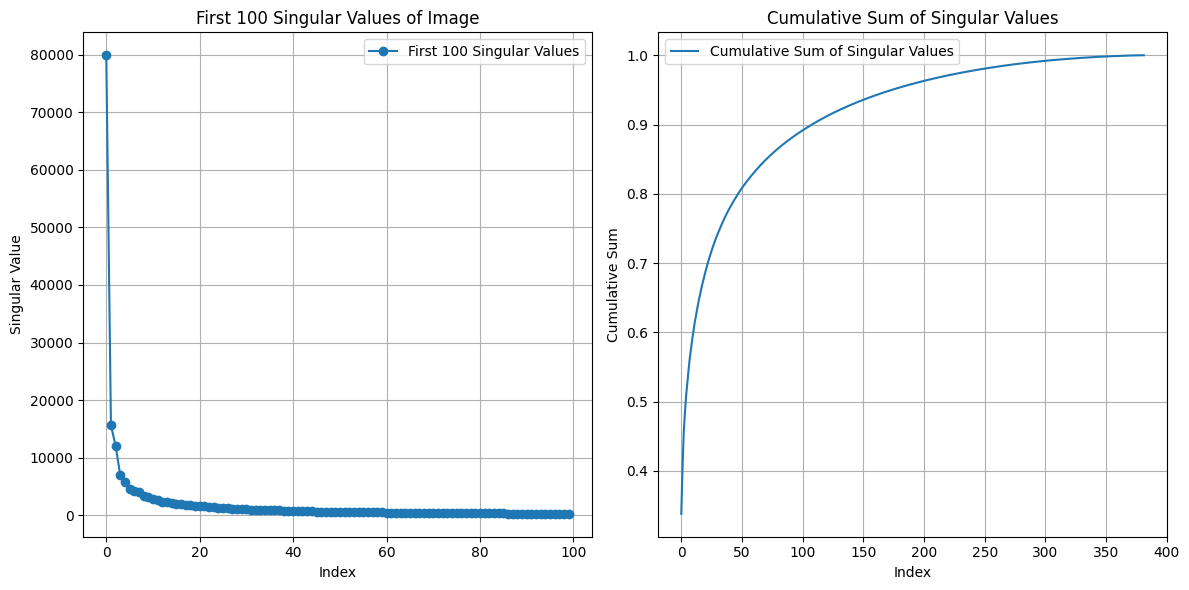

In [249]:
# apply SVD
U, S, VT = np.linalg.svd(image_array, full_matrices=False)

# Plot first 100 singular values and cummulative sum
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(S[:100], 'o-', label='First 100 Singular Values')
plt.title('First 100 Singular Values of Image')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(S) / np.sum(S), label='Cumulative Sum of Singular Values')
plt.title('Cumulative Sum of Singular Values')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

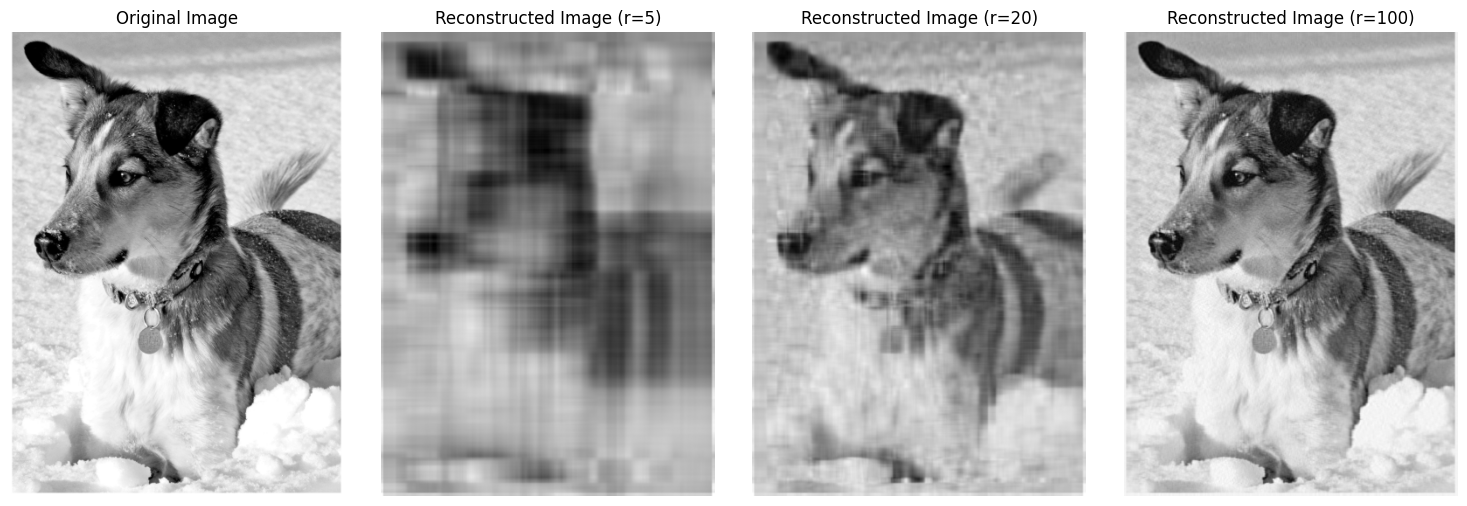

In [250]:
# Reconstruct the image using first r=5,20,100 singular vlaues

def reconstruct_image(U, S, VT, r):
    """Reconstructs the image using the first r singular values."""
    S_r = np.zeros((U.shape[0], VT.shape[0]))
    S_r[:r, :r] = np.diag(S[:r])
    return U[:, :r] @ S_r[:r, :r] @ VT[:r, :]

# Reconstruct the image using first r=5,20,100 singular values
r_values = [5, 20, 100]
reconstructed_images = []
for r in r_values:
    reconstructed_image = reconstruct_image(U, S, VT, r)
    reconstructed_images.append(reconstructed_image)
# Plot the original and reconstructed images
plt.figure(figsize=(15, 5))
plt.subplot(1, len(r_values) + 1, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')
for i, r in enumerate(r_values):
    plt.subplot(1, len(r_values) + 1, i + 2)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title(f'Reconstructed Image (r={r})')
    plt.axis('off')
plt.tight_layout()
plt.show()

You can see in this image that with a increasing number of singular values the Image becomes more and more clear.

I always compare this to the PCA analysis where the singular values explain the "variance" of the image. When we use small $r$ values so not all singular values we can see that the image gets blurred out and the details are lost.

Now compute the relative frobenius norm error

\begin{equation}
\frac{\|X - X_k\|_F}{\|X\|_F}
\end{equation}

In [251]:
# Compute the relative Frobenius norm error for each reconstructed image
errors = []
for X_k in reconstructed_images:
    rel_error = np.linalg.norm(image_array - X_k, ord='fro') / np.linalg.norm(image_array, ord='fro')
    errors.append(rel_error)
    print(f"Relative Frobenius norm error {rel_error:.4f}")

Relative Frobenius norm error 0.1538
Relative Frobenius norm error 0.0786
Relative Frobenius norm error 0.0229


How many singular values are needed to retain 90% of the energy of the image?

For this you can calculate the cumulative sum and check when it is greater than 0.9.

In [252]:
# Compute the number of singular values needed to retain 90% of the image's energy
energy = np.cumsum(S) / np.sum(S)
num_singular_values_90 = np.searchsorted(energy, 0.9) + 1
print(f"Number of singular values needed to retain 90% energy: {num_singular_values_90}")

Number of singular values needed to retain 90% energy: 109


**SVD of Small and Large Matrices**

+ The small matrices show a clear decay pattern in their singular value decomposition
+ With ill condition matrices the singular values can get difficult

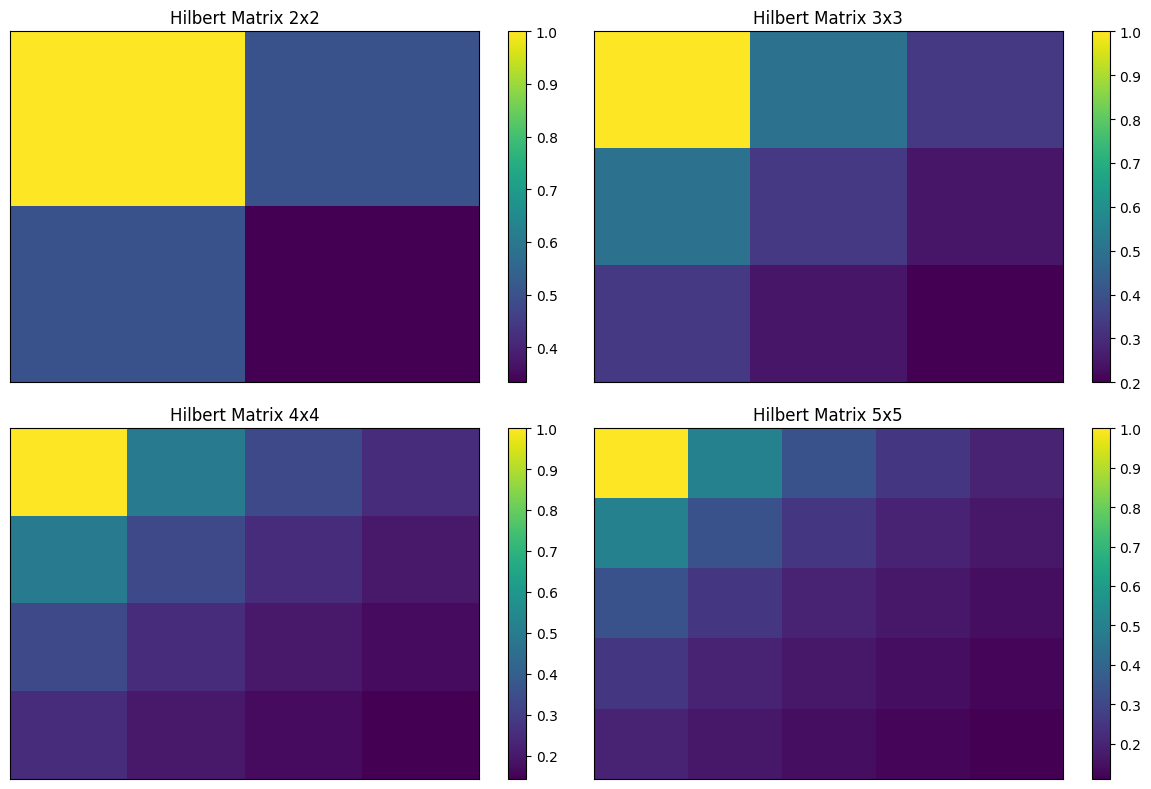

In [253]:
# Make a plot of different sized Hilbert matrices

def hilbert_matrix(n):
    """Generates an n x n Hilbert matrix."""
    return np.array([[1 / (i + j + 1) for j in range(n)] for i in range(n)])
def plot_hilbert_matrices(sizes):
    """Plots Hilbert matrices of given sizes."""
    plt.figure(figsize=(12, 8))
    for i, n in enumerate(sizes):
        H = hilbert_matrix(n)
        plt.subplot(2, 2, i + 1)
        plt.imshow(H, cmap='viridis', aspect='auto')
        plt.title(f'Hilbert Matrix {n}x{n}')
        plt.colorbar()
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()

# Plot Hilbert matrices of sizes 2, 3, 4, and 5
plot_hilbert_matrices([2, 3, 4, 5])


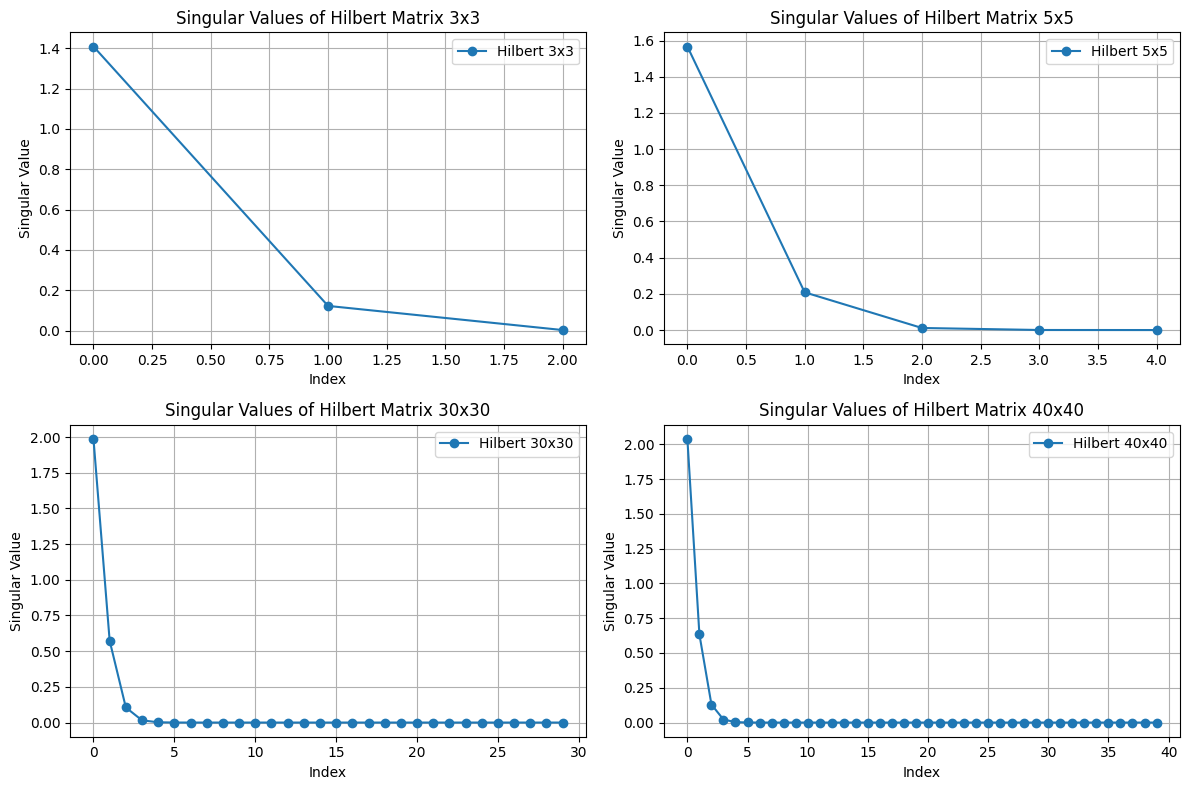

In [254]:
# Apply SVD to different sized Hilbert matrices and plot singular values

def svd_hilbert_matrices(sizes):
    """Applies SVD to Hilbert matrices of given sizes and plots singular values."""
    plt.figure(figsize=(12, 8))
    for i, n in enumerate(sizes):
        H = hilbert_matrix(n)
        U, S, VT = np.linalg.svd(H, full_matrices=False)
        plt.subplot(2, 2, i + 1)
        plt.plot(S, 'o-', label=f'Hilbert {n}x{n}')
        plt.title(f'Singular Values of Hilbert Matrix {n}x{n}')
        plt.xlabel('Index')
        plt.ylabel('Singular Value')
        plt.legend()
        plt.grid(True)
    plt.tight_layout()
    plt.show()
svd_hilbert_matrices([3,5,30,40])

You can see this clear trend in the singular values and for small matrices the singular values decay nicely. For larger matrices with ill condition the singular values can get very small and difficult to compute.